In [1]:
# import necessary library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve
# plot in jupyter notebook
%matplotlib inline 

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape # rows,cols

(303, 14)

## Data Exploration

In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

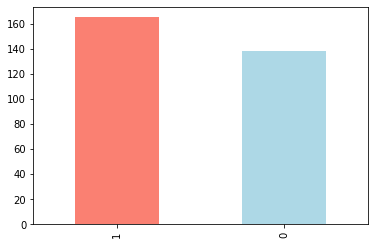

In [5]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease According To Sex

In [8]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


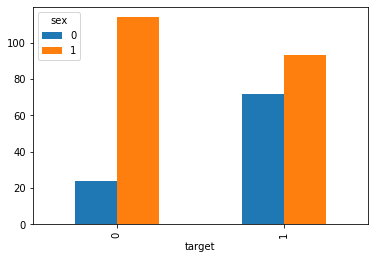

In [10]:
pd.crosstab(df.target,df.sex).plot(kind='bar')

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [12]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


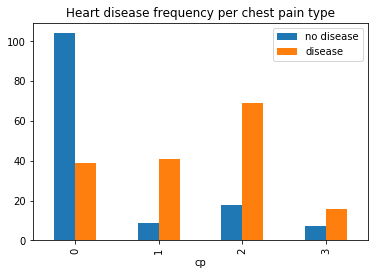

In [13]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar')
plt.title("Heart disease frequency per chest pain type")
plt.legend(["no disease","disease"])


In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(14.0, 0.0)

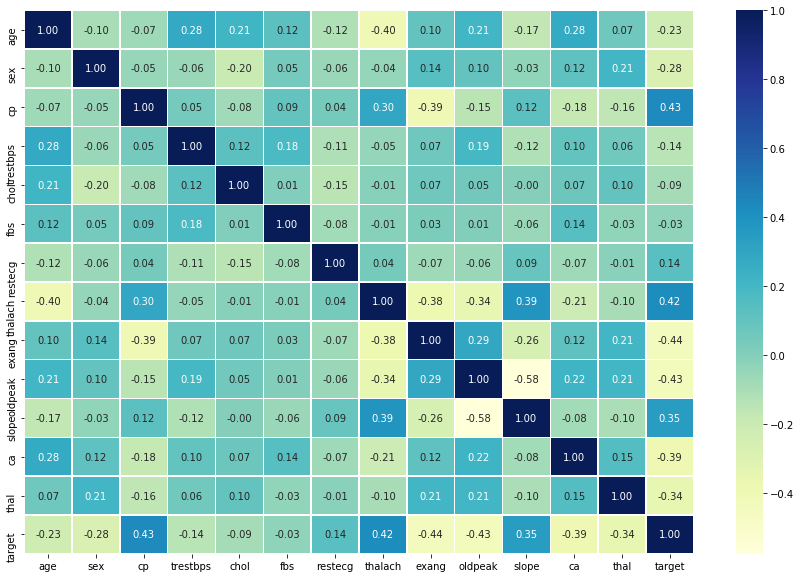

In [15]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")
bottom,top  = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

# Modeling

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Split data into X and y

X = df.drop("target",axis=1)
y = df.target

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
models = {
    "logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# create function to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-learn models
    X_train: training data
    X_test: testing data
    y_train: train labels
    y_test: testing labels
    """
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name,model in models.items():
        # Fit the model to data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [20]:
# split data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [21]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

In [22]:
model_scores

{'logistic Regression': 0.8360655737704918,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.8032786885245902}

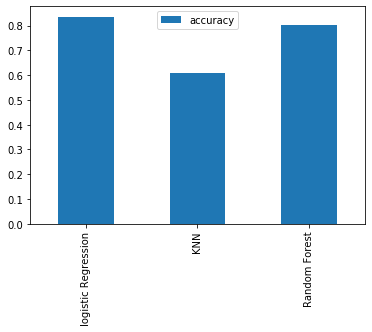

In [23]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

# Hyperparameter tuning

In [24]:
# let's tune knn
training_scores = []
testing_scores = []

neighbors = range(1,21)

# set up knn
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train,y_train)
    
    training_scores.append(knn.score(X_train,y_train))
    
    testing_scores.append(knn.score(X_test,y_test))

In [25]:
training_scores

[1.0,
 0.8140495867768595,
 0.7892561983471075,
 0.7644628099173554,
 0.768595041322314,
 0.7479338842975206,
 0.743801652892562,
 0.7066115702479339,
 0.6983471074380165,
 0.7148760330578512,
 0.6942148760330579,
 0.7024793388429752,
 0.7066115702479339,
 0.6900826446280992,
 0.6983471074380165,
 0.6818181818181818,
 0.6735537190082644,
 0.6818181818181818,
 0.6776859504132231,
 0.6776859504132231]

In [26]:
testing_scores

[0.6229508196721312,
 0.5573770491803278,
 0.6557377049180327,
 0.639344262295082,
 0.6065573770491803,
 0.6065573770491803,
 0.639344262295082,
 0.6721311475409836,
 0.6229508196721312,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6229508196721312,
 0.6557377049180327,
 0.6721311475409836,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327]

Maximum KNN score on the test data: 67.21


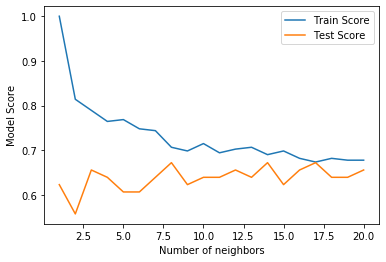

In [27]:
plt.plot(neighbors,training_scores,label="Train Score")
plt.plot(neighbors,testing_scores,label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()


print(f"Maximum KNN score on the test data: {max(testing_scores) * 100:.2f}")

# Hyperparameter with Random Search CV

In [28]:
# create a hyperparameter grid
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

In [41]:
# create a hyperparameter grid for random forest
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [32]:
# Tune logisticRegression

np.random.seed(42)

# Set up random hyperparameter serach for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for logisticregression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [35]:
rs_log_reg.score(X_test,y_test)

0.8360655737704918

In [42]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 12,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [44]:
rs_rf.score(X_test,y_test)

0.8524590163934426

## Hyperparameters tuning with gridsearchcv

In [52]:
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# fit the grid search to the data
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [53]:
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [54]:
gs_log_reg.score(X_test,y_test)

0.8360655737704918

In [55]:
# rf_grid = {"n_estimators": np.arange(10,1000,50),
#           "max_depth": [None,3,5,10],
#           "min_samples_split": np.arange(2,20,2),
#           "min_samples_leaf": np.arange(1,20,2)}
# gs_log_reg = GridSearchCV(RandomForestClassifier(),
#                           param_grid=rf_grid,
#                           cv=5,
#                           verbose=True)
# gs_log_reg.fit(X_train,y_train)

In [56]:
y_preds = gs_log_reg.predict(X_test)

In [57]:
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

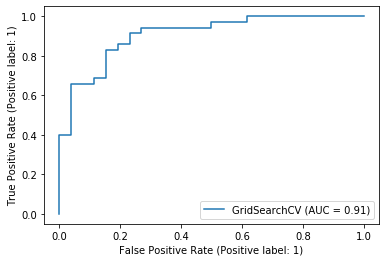

In [58]:
plot_roc_curve(gs_log_reg,X_test,y_test)

In [59]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[19  7]
 [ 3 32]]


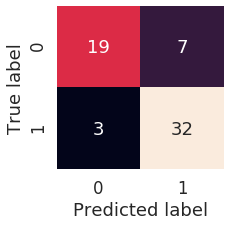

In [60]:
# visualize confusion matrix
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn heatmap
    """
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5,top - 0.5)
plot_confusion_matrix(y_test,y_preds)

In [61]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.82      0.91      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



### Calculate evaluation metric using cross validation

In [64]:
clf = LogisticRegression(C= 4.893900918477489, solver='liblinear')

In [65]:
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.86666667, 0.71666667])

In [67]:
# mean cross val accuracy
np.mean(cv_acc)

0.8248633879781421

In [68]:
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8188009641520078

In [69]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8464039460644465

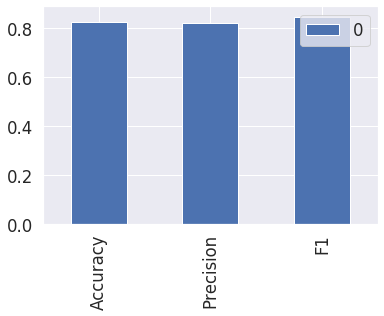

In [77]:
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc),
                          "Precision": cv_precision,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar()

### Important Features

In [78]:
clf.fit(X_train,y_train)

LogisticRegression(C=4.893900918477489, solver='liblinear')

In [79]:
clf.coef_

array([[ 0.0086825 , -1.71919216,  0.74948995, -0.02033909, -0.00528422,
         0.23288536,  0.47016243,  0.03167956, -0.83484665, -0.4201934 ,
         0.76321878, -0.77461001, -0.949709  ]])

In [80]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [81]:
feature_dict

{'age': 0.008682504075795221,
 'sex': -1.7191921555823149,
 'cp': 0.7494899471534976,
 'trestbps': -0.020339091223011207,
 'chol': -0.005284216468074204,
 'fbs': 0.23288535613805317,
 'restecg': 0.47016243214655246,
 'thalach': 0.031679561634749207,
 'exang': -0.8348466501773713,
 'oldpeak': -0.42019339709368847,
 'slope': 0.7632187770879018,
 'ca': -0.7746100106479491,
 'thal': -0.9497089986793125}

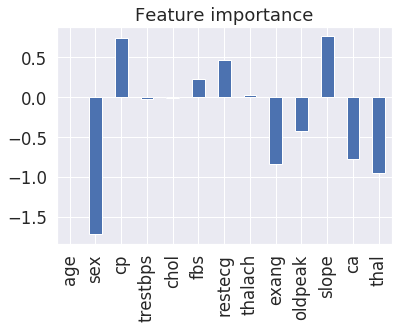

In [82]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False)